## Import  Model

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
from torch.autograd import Variable
#from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)
#ln -s "/content/gdrive/My Drive/space_cola" /WORK4

## Pandas Train Data

In [3]:
#!ls
#!ls "/content/gdrive/My Drive/space_colab"
dataframe_train = pd.read_csv('../dataset/train_data-2018-09-29-2019-09-29.csv')
dataframe_train = dataframe_train.fillna(method='ffill')
del dataframe_train['Date']
dataframe_train.shape

(249, 21)

## Pandas Test Data

In [4]:
dataframe_pred = pd.read_csv('../dataset/predict_data-2019-09-30-2020-09-30.csv')
dataframe_pred = dataframe_pred.fillna(method='ffill')
del dataframe_pred['Date']
dataframe_pred.head()

,VFINX(t-1),TROW(t-1),AME(t-1),HON(t-1),DFS(t-1),ALL(t-1),ACN(t-1),ANSS(t-1),IEX(t-1),DOV(t-1),...,FMC(t-1),ADP(t-1),ADBE(t-1),PFG(t-1),VFC(t-1),J(t-1),TEL(t-1),KSU(t-1),OKE(t-1),VFINX
0,268.591461,109.611740,90.682549,164.163223,79.028282,105.616859,187.550476,217.089996,162.049942,98.304520,...,84.523018,156.606064,277.540009,54.648434,86.484261,89.724289,90.763832,131.210144,64.879303,269.957397
1,269.957397,110.794846,91.129158,165.296432,78.621056,106.449417,188.501068,221.360001,161.399963,97.744904,...,86.044113,157.572479,276.250000,54.429340,86.679070,90.525650,91.223969,131.695297,65.224487,266.665375
2,266.665375,108.040733,88.131889,160.402039,76.536522,104.970406,185.825699,216.729996,157.115768,94.514893,...,82.619225,156.606064,272.709991,52.562325,86.698547,88.566742,89.608604,127.734856,64.357071,261.889435
3,261.889435,105.752106,85.650688,157.363800,74.471375,103.442421,181.151154,216.039993,154.377853,92.374626,...,81.804710,152.886887,266.660004,51.162056,84.458275,86.954109,87.141510,125.328857,63.401146,264.041565
4,264.041565,106.217583,86.732491,157.793655,74.180504,103.481598,182.091919,220.240005,155.126343,92.845879,...,81.647697,153.784958,272.399994,50.828663,84.906326,87.241562,87.484161,125.784309,63.719784,267.795471


##  Independent and identically distributed (I.I.D.) Testing

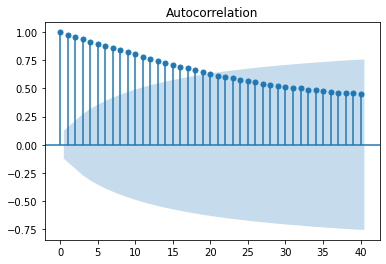

In [4]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(dataframe_train ['VFINX'].values, lags=40)
plt.show()

## PCA降維

In [5]:
import numpy as np  
from sklearn.decomposition import PCA  
X = np.array(dataframe_train[:249]) 
Y = np.array(dataframe_pred[:249]) 
pca = PCA(n_components=11)  
print (pca)  


PCA(n_components=11)


In [6]:
newData = pca.fit_transform(X)
newData1 = pca.fit_transform(Y)
print(newData)

[[-11.73655479  -3.32322856  -5.03745337 ...  -3.45392431  -3.47678847
    2.03125418]
 [ -8.45443254  -1.45621021  -7.51890488 ...  -3.99747458  -1.68162056
    3.00208837]
 [ -8.20531104   0.17216393  -6.8468852  ...  -4.56201418  -0.08028683
    1.00545091]
 ...
 [-56.64414615  24.36003441   0.37866808 ...  -0.72616687  -1.04293158
   -0.51831103]
 [-61.70266595  20.99816612   0.97789258 ...  -0.07029132  -1.1301173
   -1.54115553]
 [-66.41388598  16.4839087    4.52452084 ...  -1.01662805  -2.49204156
   -2.96534773]]


## 獲得各主成分的方差

In [7]:
print(pca.explained_variance_ratio_) 
newData1.shape

[0.71554666 0.24641023 0.01102644 0.00720578 0.00602624 0.00303617
 0.00241804 0.00220393 0.0013902  0.00108157 0.0007327 ]


(249, 11)

## Normalize test

In [8]:
from scipy import stats
print(stats.shapiro(newData1[:,10]))

ShapiroResult(statistic=0.995047390460968, pvalue=0.6017562747001648)


## Independent and identically distributed (I.I.D.) Testing

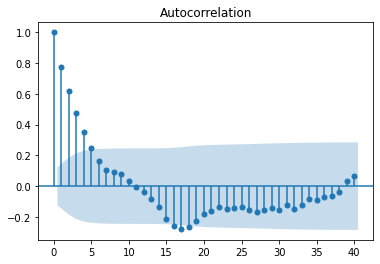

In [9]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
sm.graphics.tsa.plot_acf(newData1[:,10], lags=40)
plt.show()

## Min Max Scaler

In [10]:

from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler = scaler.fit(newData[:249])
scaled_train = scaler.fit_transform(newData[:249])
scaled_train = Variable(torch.tensor(scaled_train).type(torch.FloatTensor))

scal = MinMaxScaler()
scal = scaler.fit(newData1[:249])
scaled_test = scal.fit_transform(newData1[:249])
scaled_test = Variable(torch.tensor(scaled_test).type(torch.FloatTensor))


## Linear Model(Ir=0.09,epoch=100)

In [11]:
import torch.nn as nn
losses = []
train_losses = []

model = nn.Sequential(torch.nn.Linear(11,1))
optimizer = torch.optim.SGD(model.parameters(), lr=0.09)
loss_function = torch.nn.MSELoss()
train = scaled_train[:,10].reshape(249,1)
test = scaled_test[:,0].reshape(249,1)
model.eval()
for epoch in range(0,100):
    prediction = model(scaled_train)
    loss = loss_function(prediction,test)
    tra_loss = loss_function(prediction,train)
    losses.append(loss)#存loss
    train_losses.append(tra_loss)#存tra_loss
    optimizer.zero_grad()#微分
    loss.backward()#求反向導數
    optimizer.step()
    if epoch % 10 == 0:#每10個epoch印出來loss
        print(loss)
test.shape

tensor(0.2078, grad_fn=<MseLossBackward>)
tensor(0.0470, grad_fn=<MseLossBackward>)
tensor(0.0421, grad_fn=<MseLossBackward>)
tensor(0.0380, grad_fn=<MseLossBackward>)
tensor(0.0345, grad_fn=<MseLossBackward>)
tensor(0.0315, grad_fn=<MseLossBackward>)
tensor(0.0290, grad_fn=<MseLossBackward>)
tensor(0.0269, grad_fn=<MseLossBackward>)
tensor(0.0251, grad_fn=<MseLossBackward>)
tensor(0.0236, grad_fn=<MseLossBackward>)


torch.Size([249, 1])

## Show Loss

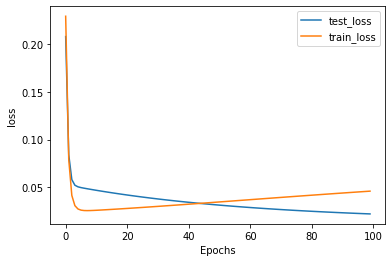

In [12]:
x_plot, = plt.plot(losses)## test
y_plot, = plt.plot(train_losses)## train
plt.legend([x_plot,y_plot],['test_loss','train_loss'])
plt.xlabel('Epochs')
plt.ylabel('loss')
plt.show()

## Draw Data(Scaler)

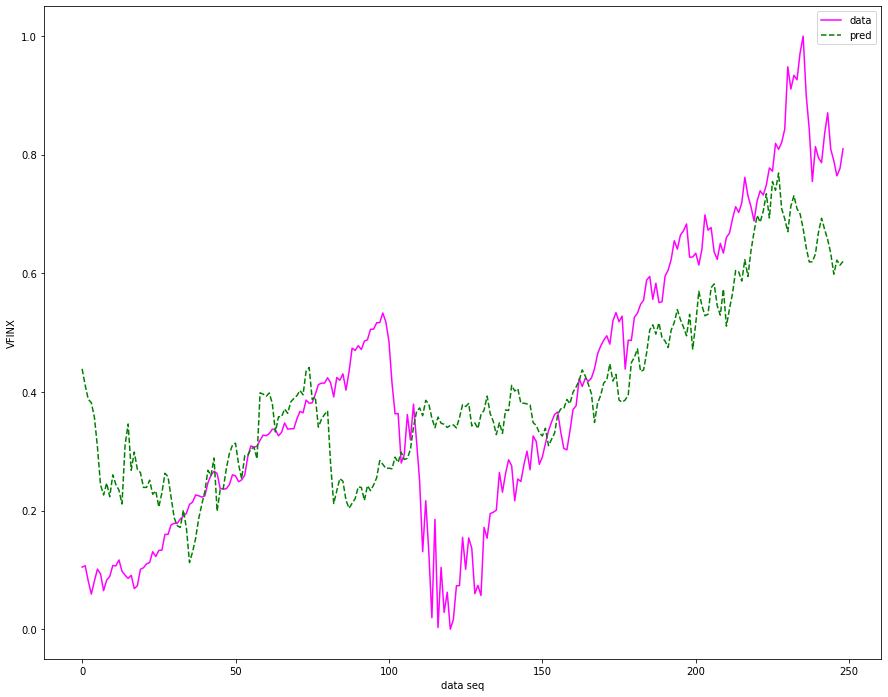

In [13]:
plt.figure(figsize=(15,12))
x_plot, = plt.plot(test,'magenta')
y_plot, = plt.plot(prediction.data, 'g--')
plt.xlabel('data seq')
plt.ylabel('VFINX')
plt.legend([x_plot,y_plot],['data','pred'])
plt.show()

## Invert scaling for forecast

(249, 1)


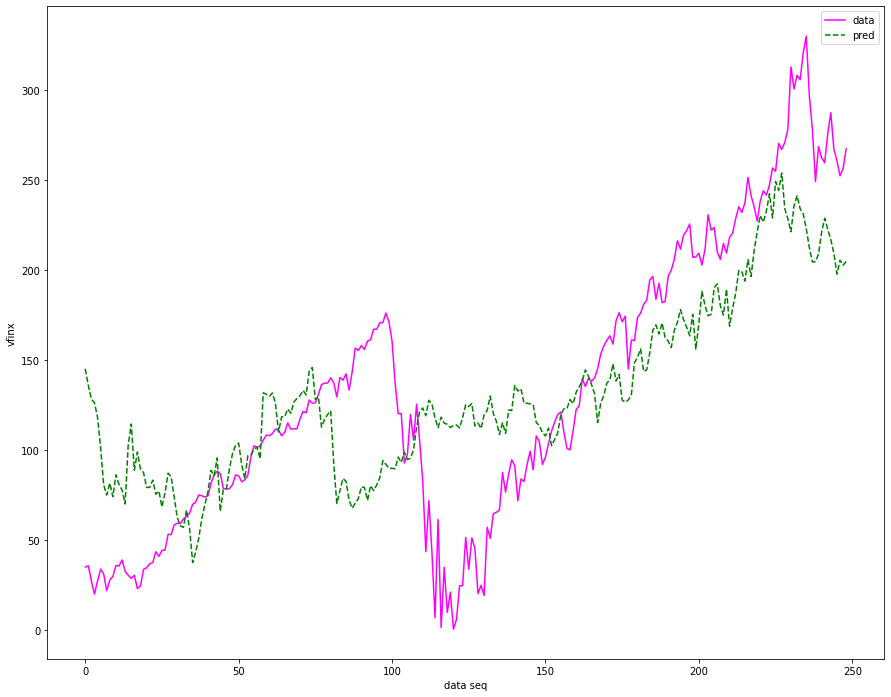

In [14]:
data1 = np.array(test)
data2 = np.array(prediction.data)
print(data1.shape)
for i in range(0,249):
  data1[i] = data1[i] * (dataframe_pred['VFINX'].max() - scal.min_[10]) + scal.min_[10]
  data2[i] = data2[i] * (dataframe_pred['VFINX'].max() - scal.min_[10]) + scal.min_[10]

plt.figure(figsize=(15,12))
x_plot, = plt.plot(data1,'magenta')
y_plot, = plt.plot(data2, 'g--')
plt.xlabel('data seq')
plt.ylabel('vfinx')
plt.legend([x_plot,y_plot],['data','pred'])
plt.show()